# Product data analysis

### imports and functions

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


In [80]:
%run ./product_functions.ipynb

### Import data and provisional analysis

In [17]:
enhanced_products_data_path="kaggle_data/enhanced_products.csv"

In [19]:
enhanced_products=pd.read_csv(enhanced_products_data_path)

In [20]:
enhanced_products.shape

(105542, 32)

In [21]:
enhanced_products.describe(include="object").T



,count,unique,top,freq
prod_name,105542,45875,Dragonfly dress,98
product_type_name,105542,131,Trousers,11169
product_group_name,105542,19,Garment Upper body,42741
graphical_appearance_name,105542,30,Solid,49747
colour_group_name,105542,50,Black,22670
perceived_colour_value_name,105542,8,Dark,42706
perceived_colour_master_name,105542,20,Black,22585
department_name,105542,250,Jersey,4604
index_code,105542,10,A,26001
index_name,105542,10,Ladieswear,26001


In [22]:
enhanced_products.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
article_id,105542.0,6.984246e+08,1.284624e+08,1.087750e+08,6.169925e+08,7.022130e+08,7.967030e+08,9.594610e+08
product_code,105542.0,6.984246e+05,1.284624e+05,1.087750e+05,6.169925e+05,7.022130e+05,7.967030e+05,9.594610e+05
product_type_no,105542.0,2.348619e+02,7.504931e+01,-1.000000e+00,2.520000e+02,2.590000e+02,2.720000e+02,7.620000e+02
graphical_appearance_no,105542.0,1.009515e+06,2.241359e+04,-1.000000e+00,1.010008e+06,1.010016e+06,1.010016e+06,1.010029e+06
colour_group_code,105542.0,3.223382e+01,2.808615e+01,-1.000000e+00,9.000000e+00,1.400000e+01,5.200000e+01,9.300000e+01
perceived_colour_value_id,105542.0,3.206183e+00,1.563839e+00,-1.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00
perceived_colour_master_id,105542.0,7.807972e+00,5.376727e+00,-1.000000e+00,4.000000e+00,5.000000e+00,1.100000e+01,2.000000e+01
department_no,105542.0,4.532778e+03,2.712692e+03,1.201000e+03,1.676000e+03,4.222000e+03,7.389000e+03,9.989000e+03
index_group_no,105542.0,3.171534e+00,4.353234e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.600000e+01
section_no,105542.0,4.266422e+01,2.326010e+01,2.000000e+00,2.000000e+01,4.600000e+01,6.100000e+01,9.700000e+01


### Index (age and gender)

<AxesSubplot:xlabel='index_group_name'>

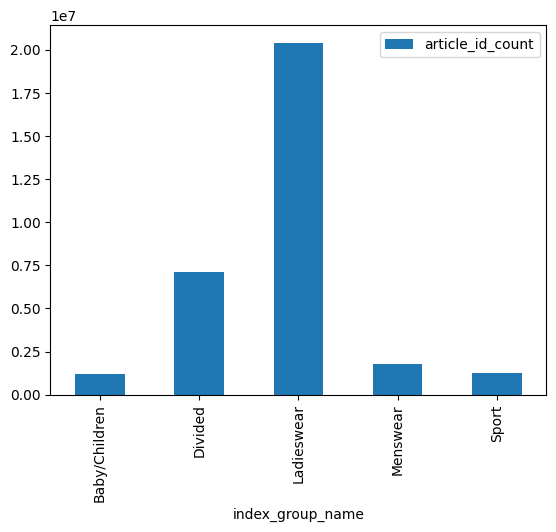

In [107]:
Age_gender = (
        enhanced_products
        .groupby('index_group_name')
        .agg({'article_id_count':'sum'})
    )
Age_gender.plot.bar()

### General price analysis

<AxesSubplot:xlabel='deciles'>

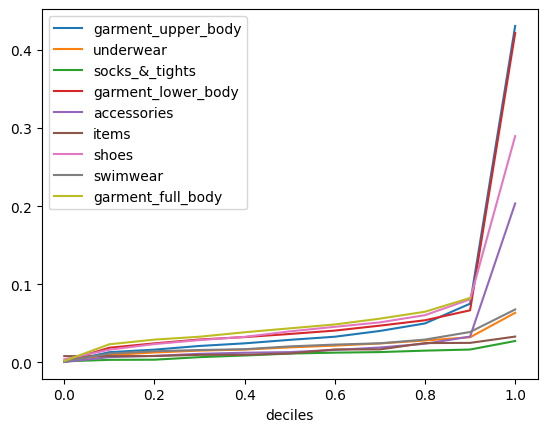

In [71]:
constrained_on='index_group_name'
constraint='Ladieswear'
categories='product_group_name'
columns=['garment_upper_body', 'underwear', 'socks_&_tights','garment_lower_body', 'accessories', 'items', 'shoes', 'swimwear', 'garment_full_body']
deciles_by_category=merged_price_deciles(contrained_on,constraint,categories,columns)
deciles_by_category.plot()

In [30]:
deciles_by_category

,garment_upper_body,underwear,socks_&_tights,garment_lower_body,accessories,items,shoes,swimwear,garment_full_body
deciles,,,,,,,,,
0.0,0.000678,0.001678,0.001401,0.001678,0.000678,0.008110,0.004000,0.001606,0.001949
0.1,0.013115,0.009452,0.003324,0.018815,0.006763,0.008112,0.016337,0.011355,0.023260
0.2,0.016403,0.012766,0.003532,0.024415,0.008430,0.008203,0.023511,0.014390,0.029225
0.3,0.021112,0.015154,0.006763,0.029363,0.011029,0.009740,0.028671,0.015909,0.032906
0.4,0.024443,0.016476,0.008906,0.032455,0.012447,0.009776,0.032724,0.016954,0.038627
0.5,0.028922,0.019302,0.011352,0.036429,0.013234,0.011507,0.039741,0.020544,0.043644
0.6,0.032913,0.021553,0.012541,0.040750,0.016001,0.016615,0.045578,0.022864,0.048600
0.7,0.040308,0.024291,0.013276,0.047105,0.019137,0.016682,0.051277,0.024514,0.056059
0.8,0.049924,0.028122,0.015117,0.053961,0.023927,0.024802,0.060524,0.029238,0.064900


### Products category 


In [87]:
product_group_names=len(pd.unique(enhanced_products['product_group_name']))
print(f"There were {product_group_names} uniques names") 
pd.unique(enhanced_products['product_group_name'])

There were 19 uniques names


array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

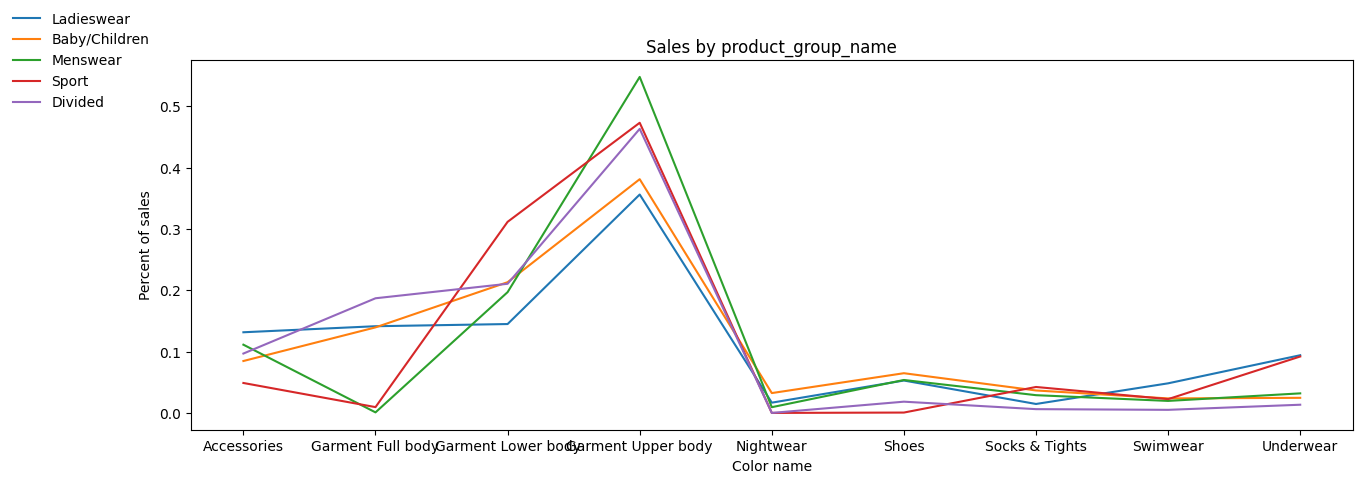

In [95]:
constrained_on='index_group_name'
grouping_column='product_group_name'
exclusions=['Bags', 'Furniture', 'Garment and Shoe care', 'Items', 'Stationery', 'Unknown', 'Cosmetic', 'Fun','Interior textile', 'Underwear/nightwear']
ordered_list = []
sales_by_tint=plot_sales_breakdown(products, constrained_on,grouping_column,exclusions,ordered_list)


### Lower category data 

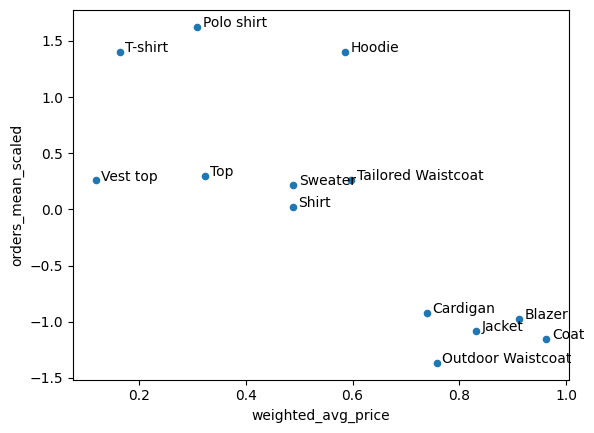

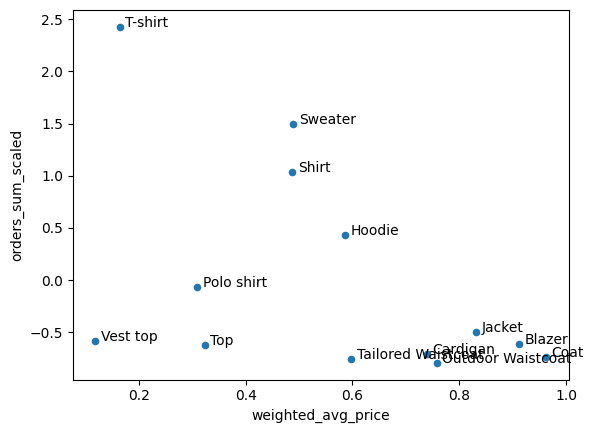

In [93]:
product_group='product_group_name'
product_group_filter='Garment Upper body'
gender_age='index_group_name'
gender_age_filter='Menswear'

upper_body_products_men=get_weighted_average_price_products(product_group, product_group_filter, gender_age, gender_age_filter)


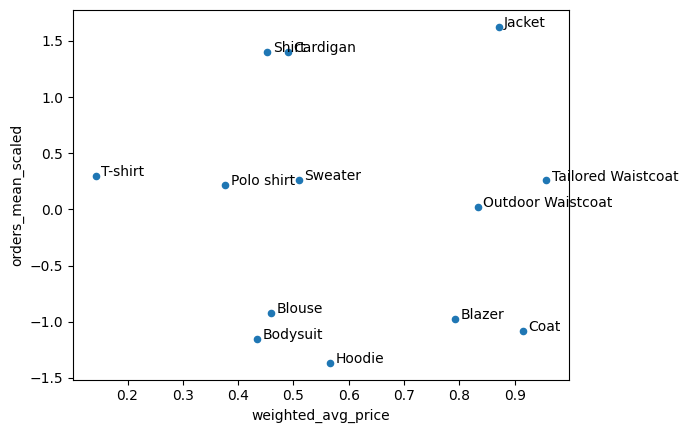

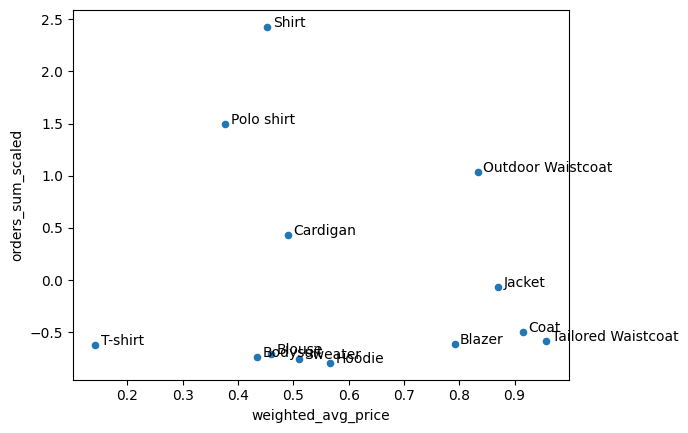

In [92]:
product_group='product_group_name'
product_group_filter='Garment Upper body'
gender_age='index_group_name'
gender_age_filter='Ladieswear'

upper_body_products_ladies=get_weighted_average_price_products(product_group, product_group_filter, gender_age, gender_age_filter)


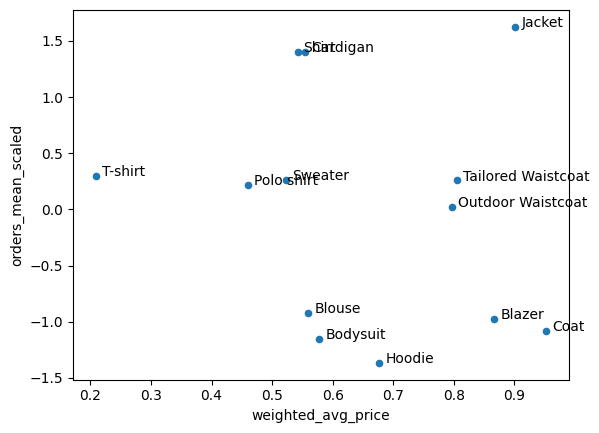

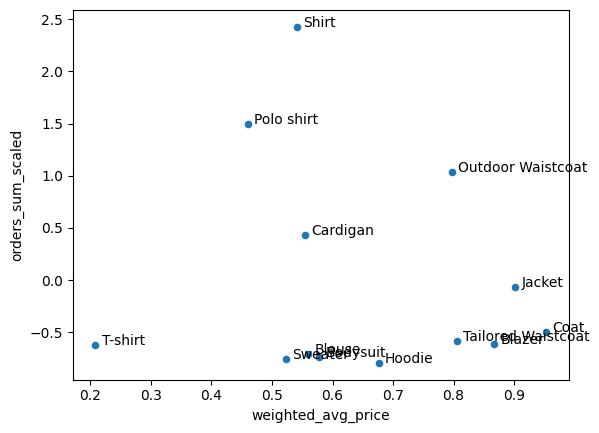

In [98]:
product_group='product_group_name'
product_group_filter='Garment Upper body'
gender_age='index_group_name'
gender_age_filter='Divided'

upper_body_products_men=get_weighted_average_price_products(product_group, product_group_filter, gender_age, gender_age_filter)


In [ ]:
product_group='product_group_name'
product_group_filter='Garment Upper body'
gender_age='index_group_name'
gender_age_filter='Divided'

upper_body_products_men=get_weighted_average_price_products(product_group, product_group_filter, gender_age, gender_age_filter)


### Perceived color 

In [99]:
perceived_colour_master_names=len(pd.unique(products['perceived_colour_master_name']))
print(f"There were {perceived_colour_master_names} uniques type names") 
pd.unique(products['perceived_colour_master_name'])

There were 20 uniques type names


array(['Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
       'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
       'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
       'Bluish Green'], dtype=object)

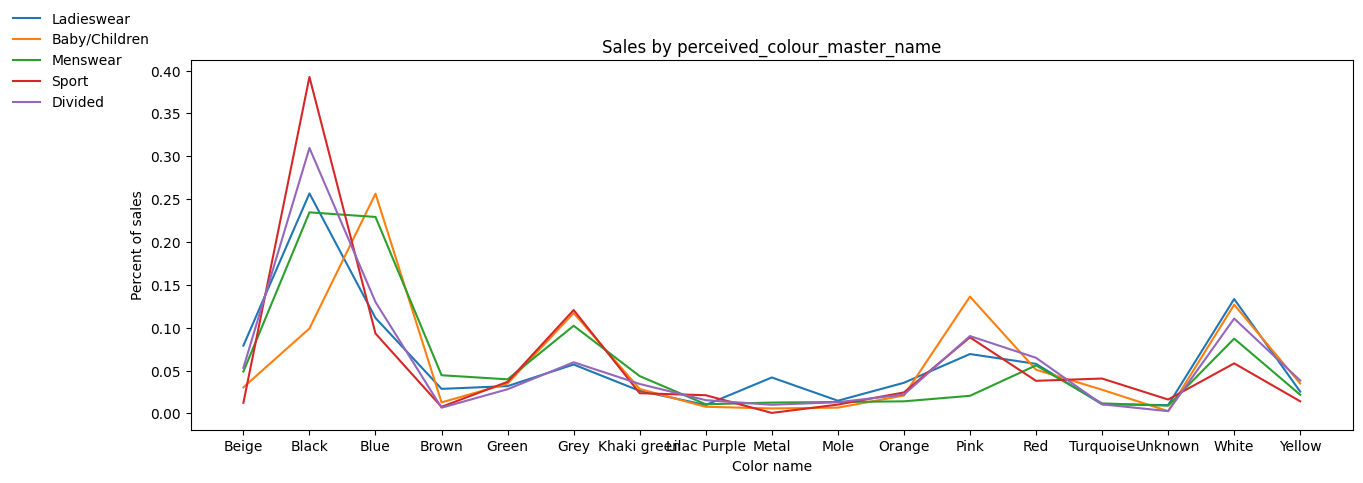

In [101]:
constrained_on='index_group_name'
grouping_column='perceived_colour_master_name'
exclusions=['Yellowish Green','undefined','Bluish Green']
ordered_list=[]

sales_by_color=plot_sales_breakdown(products, constrained_on,grouping_column,exclusions,ordered_list)


### Perceived color tint 

In [102]:
perceived_colour_value_names=len(pd.unique(products['perceived_colour_value_name']))
print(f"There were {perceived_colour_value_names} uniques names") 
pd.unique(products['perceived_colour_value_name'])

There were 8 uniques names


array(['Dark', 'Light', 'Dusty Light', 'Medium Dusty', 'Bright', 'Medium',
       'Undefined', 'Unknown'], dtype=object)

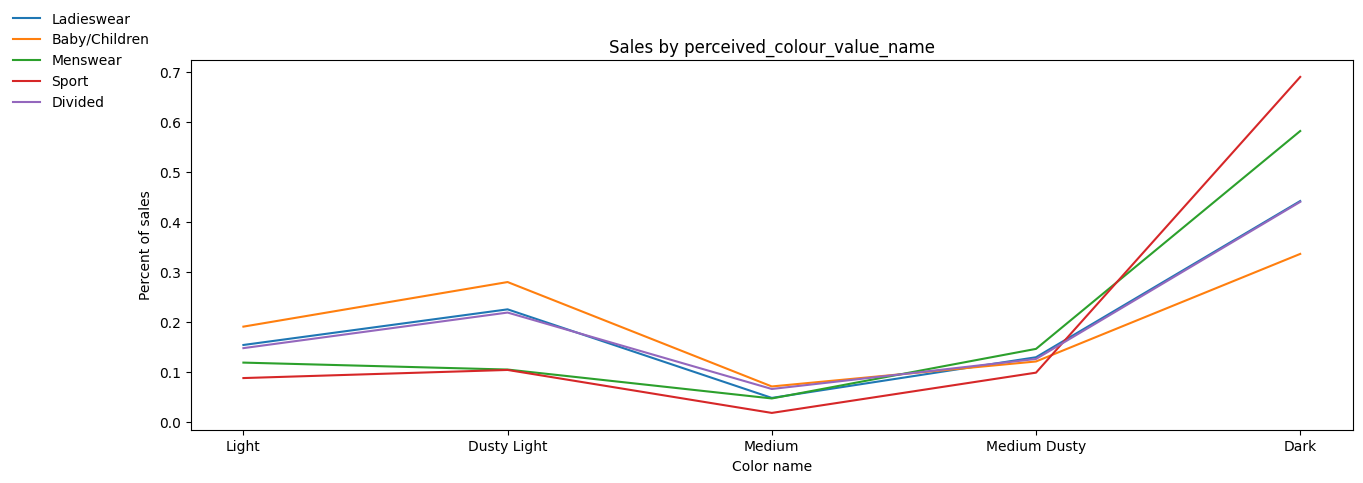

In [103]:
constrained_on='index_group_name'
grouping_column='perceived_colour_value_name'
exclusions=['Bright','Undefined','Unknown']
ordered_list = ["Light", "Dusty Light", "Medium", "Medium Dusty", "Dark"]
sales_by_tint=plot_sales_breakdown(products, constrained_on,grouping_column,exclusions,ordered_list)